In [1]:
import pickle
import numpy as np
import pandas as pd

import cv2
import mediapipe as mp

from xgboost import XGBClassifier as XGB

import warnings
warnings.filterwarnings('ignore')

c:\Users\Mahima Anand\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:

df = pd.read_csv(r'C:\Users\Mahima Anand\Documents\8 SEM\LAB\Image Processing\HAR FINAL\COORDS.csv',header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,1328,765,1339,774,1339,778,1337,781,1343,764,...,693,1289,835,1272,698,1369,810,1321,688,0
1,1309,720,1326,734,1327,737,1327,740,1328,730,...,644,1131,627,1178,640,1189,561,1233,631,0
2,1331,771,1340,772,1341,769,1341,767,1340,772,...,937,1193,607,1269,943,1248,560,1336,971,0
3,1200,696,1206,693,1207,694,1211,694,1204,690,...,720,1140,719,1115,726,1176,692,1144,712,1
4,1190,699,1195,692,1197,692,1199,692,1193,693,...,895,1161,964,1205,902,1172,987,1227,925,1


In [3]:
from PIL import Image

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
#To read model
model = pickle.load(open(r'C:\Users\Mahima Anand\Documents\8 SEM\LAB\Image Processing\HAR FINAL\HAR\XGBoost.sav','rb'))
BG_COLOR = (192, 192, 192) # gray




--------------------------------------------------

HUMAN ACTIVITY RECOGNITION

--------------------------------------------------


THE GIVEN ACTIVITY IS RECOGNISED AS : RUNNING



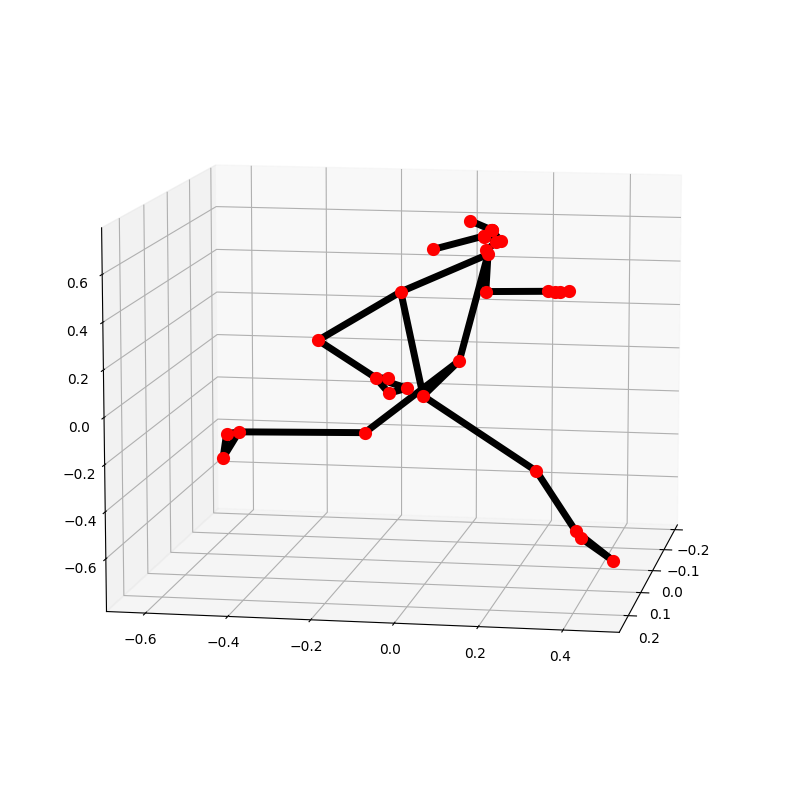

In [5]:
from PIL import Image

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
#To read model
model = pickle.load(open(r'C:\Users\Mahima Anand\Documents\8 SEM\LAB\Image Processing\HAR FINAL\HAR\XGBoost.sav','rb'))
BG_COLOR = (192, 192, 192) # gray

with mp_pose.Pose(

    static_image_mode=True,
    model_complexity=1,
    enable_segmentation=True,

    min_detection_confidence=0.5) as pose:
    #To read input activity
    image = cv2.imread(r'C:\Users\Mahima Anand\Documents\8 SEM\LAB\Image Processing\HAR FINAL\HAR\Images\RUN.jpg')
    
    #To scale images
    image_height, image_width, _ = image.shape

    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.pose_landmarks:
        
        annotated_image = image.copy()
        # Draw segmentation on the image
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        annotated_image = np.where(condition, annotated_image, bg_image)
        # Draw pose landmarks on the image.
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        
        list_x = []
        for id,lm in enumerate(results.pose_landmarks.landmark):
            h, w, c = image.shape
            cx, cy = int(lm.x * w), int(lm.y * h)
            list_x.append(cx)
            list_x.append(cy)
        
        activity = model.predict(np.asarray(list_x).reshape(1,-1))
        print("\n")
        print("-" * 50)
        print("\nHUMAN ACTIVITY RECOGNITION\n")
        print("-" * 50)
        if activity == 0:
            print("\n\nTHE GIVEN ACTIVITY IS RECOGNISED AS : STANDING\n")
        elif activity == 1:
            print("\n\nTHE GIVEN ACTIVITY IS RECOGNISED AS : WALKING\n")
        elif activity == 2:
            print("\n\nTHE GIVEN ACTIVITY IS RECOGNISED AS : RUNNING\n")
        elif activity == 3:
            print("\n\nTHE GIVEN ACTIVITY IS RECOGNISED AS : FALLING\n")
        elif activity == 4:
            print("\n\nTHE GIVEN ACTIVITY IS RECOGNISED AS : FALLEN\n")
        else:
            print("\n\nACTIIVTY NOT RECOGNISED\n")

        img = Image.fromarray(annotated_image,'RGB')
        img.show()
        # Plot pose world landmarks.
        mp_drawing.plot_landmarks(
            results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)